In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

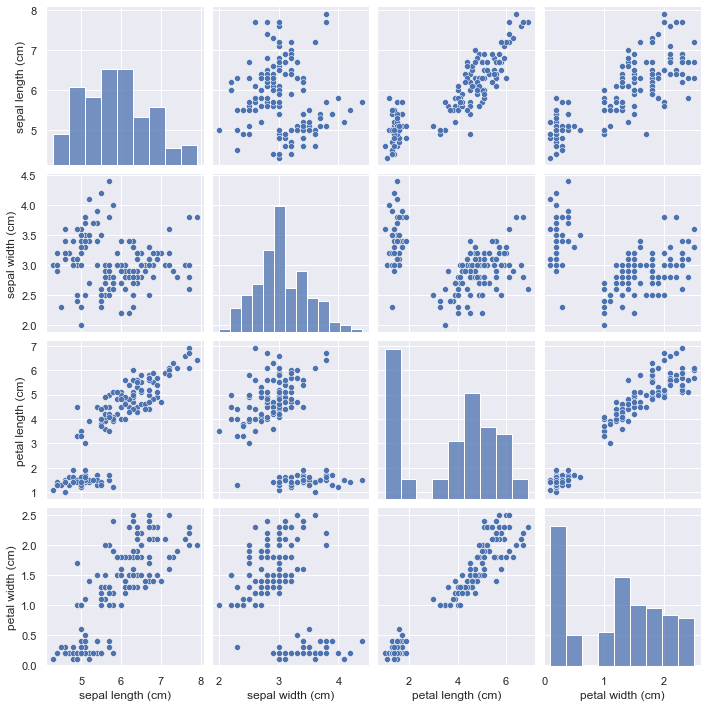

In [14]:
# using scatter plot to see the general overview and outliers:
import seaborn as sns
sns.set()

sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))

KNNeighbors -  there are two important parameters to the KNeighbors classifier: 

1) the number of neighbors

2) how you measure distance between data points (by default Euclidean distance is used)

important preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# before making the split function shuffles the dataset using a pseudorandom number generator
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# evaluate model accuracy:
acc=model.score(X_test, y_test)
# another way: acc=np.mean(predictions==y_test)
acc # = 0.97 -> 97% of the flowers in the test set were predicted correctly

0.9736842105263158

The more complex we allow our model to be, the better we will be able to predict on the training data. However, if our model 
becomes too complex, we start focusing too much on each individual data point in our training set, 
and the model will not generalize well to new data.

the larger variety of data points your dataset contains, the more complex a model you can use without overfitting.
However, simply duplicating the same data points or collecting very similar data will not help.

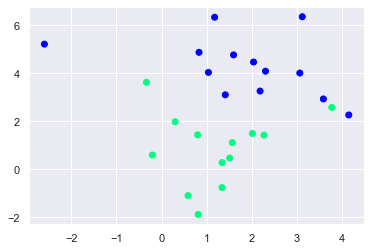

In [35]:
# *******************************************SUPERVISED LEARNING:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=26, centers=2, cluster_std=1.4, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')



In [41]:
# CLASSIFICATION - CANCER MALIGNANT OR BENIGN: 

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
# how many samples contain each group

import numpy as np

x=zip(cancer.target_names,np.bincount(cancer.target))
list(x)

[('malignant', 212), ('benign', 357)]

In [76]:
# or:
import pandas as pd

df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df=pd.concat([df, pd.Series(cancer.target)], axis=1).rename(columns={0:'target'})
df.groupby('target')['target'].count()

target
0    212
1    357
Name: target, dtype: int64

In [131]:
# KNN - after training the dataset, for each test point there are extracted the closest neighbors 
# (its number id provided as a parameter) for each test point, we count how many neighbors belong to class 0 and 
# how many neighbors belong to class 1.  We then assign the class that is more frequent: 
# in other words, the majority class among the k-nearest neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc= model.score(X_test, y_test)
acc

0.9230769230769231

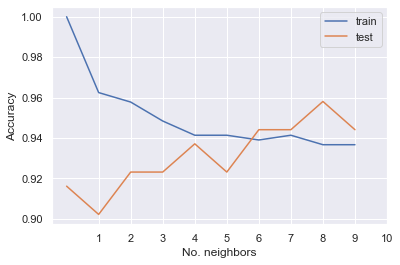

In [161]:
# comparing multiple neighbor numbers:
import seaborn as sns
sns.set()

neighbors=np.arange(1,11)
acc_test=np.empty(len(neighbors))
acc_train=np.empty(len(neighbors))

for i, j in enumerate(neighbors):
    model=KNeighborsClassifier(n_neighbors=j)
    model.fit(X_train, y_train)
    model.predict(X_test)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xlabel('No. neighbors')
plt.ylabel('Accuracy')
plt.gca().set_xticks(neighbors)
plt.legend()

# Considering a single nearest neighbor, the prediction on the training set is perfect;
# using the single nearest neighbor leads to a model that is toocomplex. On the other hand, when considering 10 neighbors, 
# the model is too simple and performance is even worse.

REGRESSION  Regression is a statistical method  that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

x[0]->x[p] - denotes the features of a single data point
a and b - are parameters of the model that are learned,


- simple linear regression : uses one independent variable 'x' (one feature) to explain or predict the outcome of the dependent variable 'Y'
    y=ax +b

- multiple linear regression : uses two or more independent variables 'x' (multiple features) to predict the outcome of the dependent variable 'Y'

    y= a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b

- non-linear regression methods : when data shows a curvy trend, are a relationship between independent variables ùë• and a dependent variable ùë¶ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear and is usually represented by the polynomial of ùëò degrees (maximum power of ùë•).

    ùë¶ =ùëéx¬≥ +ùëèùë•¬≤+ùëêùë•+ùëë
    
   

LINEAR REGRESSION = ORDINARY LEAST SQUARES (OLS),

Linear regression finds the parameters 'a' and 'b' that minimize the MEAN SQUARED ERROR between predictions and the true regression targets, y, on the training set.

The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).

MSE - is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

a = slope = model.coef_ = is a NumPy array with one entry per input feature

b = intercept = model.intercept_ = is always a single float number

underscore at the end - scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore.


A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. One approach to addressing the stability of regression models is to change the loss function to include additional costs. Linear regression models that use these MODIFIED LOSS FUNCTIONS during training = penalized linear regression (RIDGE - L2 OR LASSO - L1).


LINEAR MODELS - POWERFUL FOR THE HIGH DIMENSIONAL DATASETS:

- fast to train, fast to predict

- if your dataset has highly correlated features the coefficients might be hard to interpret

- Linear models often perform well when the number of features is large compared to the number of samples.

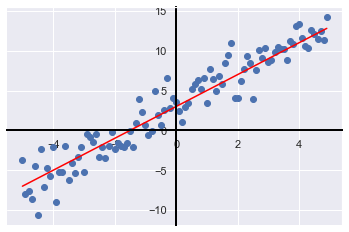

In [311]:
# SIMPLE LINEAR REGRESSION - EXAMPLE:
rng=np.random.RandomState(1)

x=np.arange(-5,5,0.1) # 100 items array
y=2*x +3

y_noise=2 * rng.normal(size=x.size)
y_data = y+y_noise

plt.scatter(x,y_data)
plt.plot(x, y, color='red')

plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')

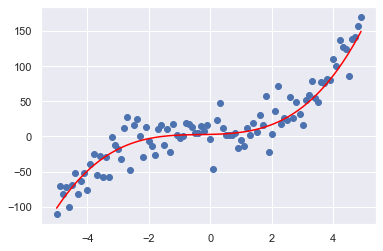

In [275]:
# NON-LINEAR REGRESSION:
y=1*(x**3) + 1*(x**2)+1*(x)+3 # 1D array 100 items
y_noise=20*rng.normal(size=x.size)
y_data=y+y_noise   # 1D array 100 items

plt.scatter(x, y_data)
plt.plot(x, y, color='red')

In [175]:
# KNN ALGORITHM:
# When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

from sklearn.neighbors import KNeighborsRegressor
# model.score returns R2 score = coeafficient of determination (0-1, 0=mean of the model, 1=perfect prediction)

line=np.linspace(-3,3,1000)
line=line[:, np.newaxis]
neighbors=[1,3,9]

# fig, axes = plt.subplots(1,3,figsize=(15,3))

# for i, ax in zip(neighbors, axes):
#     model=KNeighborsRegressor(n_neighbors=i)
#     model.fit(X_train, y_train)
#     ax.plot(line, model.predict(line))
#     ax.set_xlabel('Feature')
#     ax.set_ylabel('Target')


LINEAR MODEL = weighted sum of the input features -> weight=a:

y = ax + b  => one feature

for more features 'a' contains the slopes along each feature axis


There are many different linear models for regression. The difference between these models lies in how the model parameters a and b are learned from the training data, and how model complexity can be controlled.

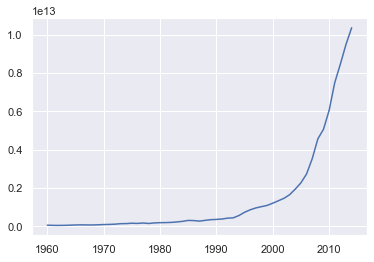

In [294]:
# Example - looking for a non linear model - dataset - annual gross domestic income in US dollars between the years 1960-2014

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv', index_col='Year')
plt.plot(df)

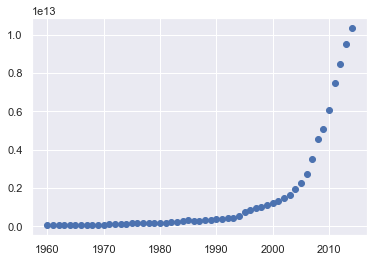

In [298]:
# or without year as an index:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
plt.plot(df.Year, df.Value, 'o')  # marker 'o' - default line

# the shape of a value column is similar to the logistic function

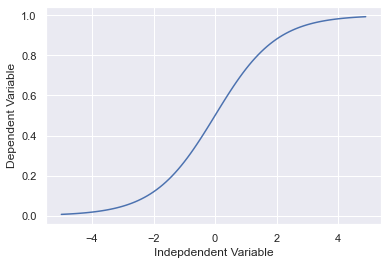

In [310]:
# the shape of above plot is similar to the logistic function:

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))  # np.exp = exponent e=constant =2.71828183 np.exp([1,2,3])=np.power(2.71828183, [1,2,3])
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [317]:
# LINEAR REGRESSION -BOSTON HOUSE PRICES:
from sklearn.datasets import load_boston

df=load_boston()
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [319]:
X, y = df.data, df.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model=LinearRegression()
model.fit(X_train, y_train)

print('Accuracy of the training set: ', model.score(X_train, y_train))
print('Accuracy of the test set: ', model.score(X_test, y_test))

# low discrepancy between performance of the training set and the test set is not a sign of overfitting, 
# in case of overfitting we should verify another regression algorithms which allow to control complexity e.g Ridge

Accuracy of the training set:  0.7697699488741149
Accuracy of the test set:  0.6354638433202145


In [335]:
# checking the prediction of the first element from the dataset

X_new = X[0, np.newaxis]
pred=model.predict(X_new)

print(f'The actual value (label) of the first element is {y[0]}, but model predicted: {pred[0]}')

The actual value (label) of the first element is 24.0, but model predicted: 30.460905933879054


RIDGE REGRESSION = L2:

linear model for regression; 

the coefficients (a) are chosen not only so that they predict well on the training data, but also to fit an additional 
constraint = REGULARIZATION.

Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization

RIDGE REGRESSION'S goal is to achieve the magnitude of coefficients to be as small as possible; 
all entries of 'a' should be close to zero. Intuitively, this means each feature should have as little effect on the outcome 
as possible (which translates to having a small slope), while still predicting well

It's less complex model = worse performance on the training set, but better generalization.


ALPHA PARAMETER - DEFAULT=1, determines how much importance the model places on SIMPLICITY versus TRAINING SET PERFORMANCE (worse performance on the training set = better generalization (simpler model))

The optimum setting of alpha depends on the particular dataset we are using.

INCREASING ALPHA = COEFFICIENTS move more TOWARD ZERO (=more restricted model, worse generalization, better training set performance)

If we set alpha too low, however, we again remove the effect of regularization and end up overfitting.

In [337]:
from sklearn.linear_model import Ridge

model_ridge=Ridge()
model_ridge.fit(X_train, y_train)

print(f'Accuracy of the training set: {model_ridge.score(X_train, y_train)}\nAccuracy of the test set: {model_ridge.score(X_test, y_test)}')

Accuracy of the training set: 0.7678858330771393
Accuracy of the test set: 0.6266182204613853


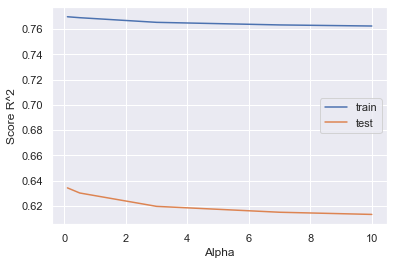

In [340]:
# COMPARING RIDGE ALGORITHM WITH THE DIFFERENT VALUES OF ALPHA PARAMETER:

alpha=[0.1, 0.5, 3, 7, 10]

acc_train=np.empty(len(alpha))
acc_test=np.empty(len(alpha))

for i, j in enumerate(alpha):
    model=Ridge(alpha=j)
    model.fit(X_train, y_train)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(alpha, acc_train, label='train')
plt.plot(alpha, acc_test, label='test')
plt.xlabel('Alpha')
plt.ylabel('Score R^2')
plt.legend()
# alpha 0.1 seems to provide the best result

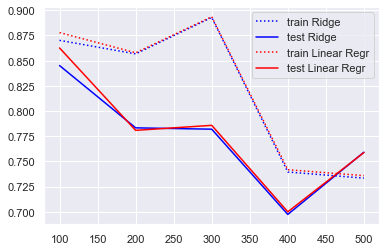

In [357]:
# another way is to manipulate the size of the dataset with fixed alpha parameter:

size=[100,200,300,400,500]

accR_train=np.empty(len(size))
accR_test=np.empty(len(size))
accLR_train=np.empty(len(size))
accLR_test=np.empty(len(size))

for i, j in enumerate(size):
    X1, y1=X[:j], y[:j]
    X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, random_state=1)
    modelLR=LinearRegression()
    modelLR.fit(X1_train, y1_train)
    accLR_train[i]=modelLR.score(X1_train, y1_train)
    accLR_test[i]=modelLR.score(X1_test, y1_test)
    modelR=Ridge(alpha=1)
    modelR.fit(X1_train, y1_train)
    accR_train[i]=modelR.score(X1_train, y1_train)
    accR_test[i]=modelR.score(X1_test, y1_test)    
    
    
plt.plot(size, accR_train, ":", label='train Ridge', color='blue')
plt.plot(size, accR_test, label='test Ridge', color='blue')
plt.plot(size, accLR_train, ":", label='train Linear Regr', color='red')
plt.plot(size, accLR_test, label='test Linear Regr', color='red')
plt.legend()

# with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will 
# have the same (similar) performance.

LASSO = L1, 

- like Ridge, restricts coefficients to be close to zero - in a quite different way: when using the lasso, some coefficients are exactly zero = some features are entirely ignored by the model (model becames easier to interpret and can reveal the most important features)

- ALPHA PARAMETER - DEFAULT=1, controls how strongly coefficients are pushed toward zero, 
    
    REDUCE OVERFITTING = DECREASE ALPHA -> ALSO THE MAX_ITER PARAMETER HAS TO BE INCREASED (the maximum number of iterations to run)
    
    
    If we set alpha too low, however, we again remove the effect of regularization and end up overfitting.
    
In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

In [363]:
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(X_train, y_train)

print(f'Training set score: {model.score(X_train, y_train)}\nTest set score: {model.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model.coef_!=0)}')

Training set score: 0.715049987433698
Test set score: 0.5516247059049908
Total number of features: 13
Number of features taken into consideration by the model: 11


In [364]:
# model results with lower alpha parameter and higher max_iter:

model001=Lasso(alpha=0.01, max_iter=100000)
model001.fit(X_train, y_train)

print(f'Training set score: {model001.score(X_train, y_train)}\nTest set score: {model001.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model001.coef_!=0)}')

Training set score: 0.7693295893976123
Test set score: 0.6316839365596244
Total number of features: 13
Number of features taken into consideration by the model: 13


In [370]:
# setting alpha parameter too low - ends up with overfitting:
model00001=Lasso(alpha=0.0001, max_iter=100000)
model00001.fit(X_train, y_train)

print(f'Training set score: {model00001.score(X_train, y_train)}\nTest set score: {model00001.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model00001.coef_!=0)}')

Training set score: 0.7697699048248853
Test set score: 0.6354315853708357
Total number of features: 13
Number of features taken into consideration by the model: 13


ELASTIC NET:

is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

elastic_net_penalty = (alpha * l1_penalty) + ((1 ‚Äì alpha) * l2_penalty)

ALPHA of 0.5 would provide a 50% contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

Another hyperparameter is provided called LAMBDA that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty.

Confusingly, the alpha hyperparameter can be set via the ‚Äúl1_ratio‚Äù argument that controls the contribution of the L1 and L2 penalties and the lambda hyperparameter can be set via the ‚Äúalpha‚Äù argument that controls the contribution of the sum of both penalties to the loss function.

In [372]:
from sklearn.linear_model import ElasticNet

modelEN=ElasticNet(alpha=1, l1_ratio=0.5)
modelEN.fit(X_train, y_train)


print(f'Training set score: {modelEN.score(X_train, y_train)}\nTest set score: {modelEN.score(X_test, y_test)}')

Training set score: 0.7208704087353837
Test set score: 0.5603163143661134


In [386]:
# testing different configurations of the alpha and l1 parameters - manually or automatically using built in ElasticNetCV:
# By default, the model will test 100 alpha values and use a default ratio. We can specify our own lists of values.

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# ratios = np.arange(0, 1, 0.01)
# alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# modelENC = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=cv, n_jobs=-1)
modelENC = ElasticNetCV(cv=cv, n_jobs=-1)

modelENC.fit(X, y)

print('alpha: %f' % modelENC.alpha_)
print('l1_ratio_: %f' % modelENC.l1_ratio_)

alpha: 1.449641
l1_ratio_: 0.500000


LINEAR MODELS FOR CLASSIFICATION:

algorithms:

- logistic regression - is a classification algorithm and not a regression algorithm
- SVM


By default, both models apply an L2 regularization, in the same way that Ridge does for regression;

C - the parameter that determines the strength of the regularization = higher values of C correspond to less regularization (high value for the parameter C try to fit the training set as best as possible = overfitting)


In [392]:
# logistic regression - cancer dataset:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

model=LogisticRegression() # default C=1
model.fit(X_train, y_train)

print(f'Training set score: {model.score(X_train, y_train)}\nTest set score: {model.score(X_test, y_test)}')

# training and test set performance are very close, it is likely that there is an underfitting 

Training set score: 0.9553990610328639
Test set score: 0.958041958041958


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [393]:
# comparing different values of the C parameter:
model100=LogisticRegression(C=100).fit(X_train, y_train)

print(f'Training set score: {model100.score(X_train, y_train)}\nTest set score: {model100.score(X_test, y_test)}')

Training set score: 0.9436619718309859
Test set score: 0.958041958041958


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [394]:
model001=LogisticRegression(C=0.01).fit(X_train, y_train)

print(f'Training set score: {model001.score(X_train, y_train)}\nTest set score: {model001.score(X_test, y_test)}')

Training set score: 0.9366197183098591
Test set score: 0.9300699300699301


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [398]:
# in LogisticRegression as a default penalty is taken L2 Ridge algorithm, verifying above C values with L1 Lasso:

C=np.array([0.01, 1.0, 100])

acc_train=np.empty(len(C))
acc_test=np.empty(len(C))

for i, j in enumerate(C):
    model=LogisticRegression(C=j, penalty="l1", solver='liblinear')
    model.fit(X_train, y_train)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)
    
for m, n in enumerate(C):
    print(f'Training set score for C = {n}: {acc_train[m]}')
    print(f'Test set score for C = {n}: {acc_test[m]}')

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training set score for C = 0.01: 0.9178403755868545
Test set score for C = 0.01: 0.9300699300699301
Training set score for C = 1.0: 0.960093896713615
Test set score for C = 1.0: 0.958041958041958
Training set score for C = 100.0: 0.9859154929577465
Test set score for C = 100.0: 0.9790209790209791


LINEAR MODELS FOR MULTICLASS CLASSIFICATION:

Many linear classification models are for binary classification only, and don‚Äôt extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach.

In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class ‚Äúwins,‚Äù and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (a) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:

a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b


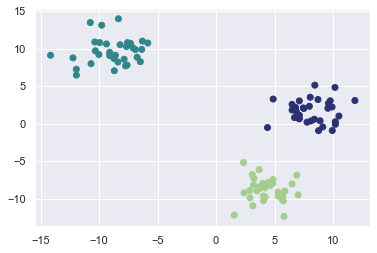

In [408]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, cluster_std=1.6)

plt.scatter(X[:,0], X[:,1], c=y, cmap='crest')

In [409]:
from sklearn.svm import LinearSVC

model=LinearSVC()
model.fit(X, y)

print(f'Coefficient shape: {model.coef_.shape}\nIntercept shape: {model.intercept_.shape}')

# the dataset contains 3 classes (3 centers) as y label and 2 features (X shape=100 rows 2 columns)

# coefficient (3,2) -> 3 rows: in each row one class, 2 columns - for each feature
# intercept (3,) -> 1D array - 3 items, storing the intercepts for each class

Coefficient shape: (3, 2)
Intercept shape: (3,)


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SUMMARY - PARAMETERS : 

- ALPHA - in the REGRESSION MODELS

- C - LinearSVC, LogisticRegression

LARGE ALPHA <-> SMALL C = SIMPLE MODELS

1st decision - choosing appropiate values of alpha and C

2nd decision - choosing regularization: L1 (Lasso) or L2 (Ridge):

If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

NAIVE BAYES CLASSIFIERS:

faster in training than linear models - The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC

- GaussianNB - any continuous data; stores the average value as well as the standard deviation of each feature for each class; mostly used on very high-dimensional data
- BernoulliNB - binary data, counts how often every feature of each class is not zero
- MultinomialNB - count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence); takes into account the average value of each feature for each class, 

ALPHA:

- MultinomialNB and BernoulliNB - MultinomialNB usually performs better than BernoulliNB, particularly on datasets with a relatively large number of nonzero features

- controls model complexity, large alpha results in less model complexity, setting alpha is not critical for good performance


To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted.

For both MultinomialNB and BernoulliNB, this leads to a prediction formula that is of the same form as in the linear
models.  coef_ for the naive Bayes models has a different meaning than in the linear models, in that coef_ is not the same as 'a'.

DECISION TREES:
 - REGRESSION AND CLASSIFICATION